## Persian Affiliations

annotations dir: محل ذخیره ی فایل های نشانه گذاری شده

json name format: نحوه ی نام گذاری فایل های جیسون

papers text dir: محل ذخیره ی فایل های متنی صفحه ی اول مقالات

text name format: نحوه ی نام گذاری فایل های متنی

In [15]:
ANNOTATIONS_DIR = 'annotations/'
JSON_NAME_FORMAT = 'metadata_ paper{number}.json'

PAPERS_TEXT_DIR = 'train/'
TXT_NAME_FORMAT = '{number}.txt'

In [2]:
import os

یافتن اندیس کلمه در جمله

In [3]:
def find_abstract_index(sentence, word):
    try:
        return sentence.index(word)
    except ValueError:
        return None

تابع محاسبه ی شباهت دو رشته بر اساس شاخص کسینوسی

In [4]:
def cosine_sim(first, second):
    X = {word for word in first.split()}
    Y = {word for word in second.split()}

    l1 = []
    l2 = []

    rvector = X.union(Y)  
    for w in rvector:
        if w in X:
            l1.append(1)
        else:
            l1.append(0) 
        if w in Y:
            l2.append(1) 
        else:
            l2.append(0)
    c = 0

    for i in range(len(rvector)): 
            c += l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    
    return cosine

شمارش تعداد کلمات مرتبط در یک خط

In [5]:
def count_affiliation_related_words(line):
    affiliation_related_words = ['دانشگاه', 'استاد', 'کارشناسی', 'ارشد', 'دکتری',\
                                 'دانشکده', 'هیئت', 'هیأت', 'گروه', 'نویسنده'\
                                 'رشته', 'مربی', 'استادیار', 'دانشیار', 'استاد تمام',\
                                 'مدرس', 'دبیر', 'مکاتبات']
    cnt = 0
    for arw in affiliation_related_words:
        if arw in line:
            cnt += 1
    return cnt+1 if 'استان' in line or 'شهرستان' in line else cnt

پیمایش روی فایل های آموزش

In [6]:
import re

In [7]:
paper_numbers = [re.search(r'\b\d+\b', s).group() for s in \
                 [file_name for file_name in os.listdir(PAPERS_TEXT_DIR)]]
paper_numbers

['8', '14', '28', '601', '20', '25', '3', '24', '6', '26']

In [8]:
import json

In [9]:
searched_affiliations = {}
measures = {'FP':0, 'FN':0, 'CR':0}

avg_sim, cnt = 0, 0
for paper_number in paper_numbers:
    searched_affiliations[paper_number] = []
    
    annotated_aff = ""
    searched_aff = ""
    
    json_name = JSON_NAME_FORMAT.format(number=paper_number)
    txt_name = TXT_NAME_FORMAT.format(number=paper_number)
    print("\n", '~'*20, txt_name, ' VS ', json_name, '~'*20)

    chekide = True  # در محدوده ی چکیده نیستیم
    with open(PAPERS_TEXT_DIR+txt_name, 'r') as txt_file:
    
        print('\nannotated:\n')
        with open(ANNOTATIONS_DIR+json_name) as json_file:
            for aff in json.load(json_file)['affiliations']:
                annotated_aff += aff
                print(aff+'\n')
                
        print('\nsearched:\n')
        for line in txt_file.read().split('\n'):
            if find_abstract_index(line, 'چکیده') != None \
            or find_abstract_index(line, 'پیشگفتار') != None \
            or find_abstract_index(line, 'کلید') != None:
                chekide = not chekide
            elif chekide:
                if count_affiliation_related_words(line) >= 2:
                    searched_aff += line
                    print(line+'\n')
                    searched_affiliations[paper_number].append(line)
    cnt += 1
    cs = cosine_sim(annotated_aff, searched_aff)
    measures['CR'] += cs
    if cs == 1:
        print("CORRECT")
    elif len(annotated_aff) > len(searched_aff):
        measures['FN'] += 1-cs
        print("FALSE NEGATIVE")
    else:
        measures['FP'] += 1-cs
        print("FALSE POSITIVE")
    avg_sim += cs

avg_sim /= cnt


 ~~~~~~~~~~~~~~~~~~~~ 8.txt  VS  metadata_ paper8.json ~~~~~~~~~~~~~~~~~~~~

annotated:

دانشگاه آزاد اسلامی واحد علوم و تحقیقات تهران، دانشکده علوم پایه، گروه زیست شناسی، تهران، ایران

دانشگاه آزاد اسلامی واحد تهران شمال، دانشکده علوم زیستی، گروه زیست شناسی، تهران، ایران

دانشگاه آزاد اسلامی واحد تهران شمال، دانشکده علوم زیستی، گروه زیست شناسی، تهران، ایران

دانشگاه آزاد اسلامی واحد علوم و تحقیقات تهران، دانشکده علوم پایه، گروه زیست شناسی، تهران، ایران


searched:

دانشگاه آزاد اسلامی واحد علوم و تحقیقات تهران، دانشکده علوم پایه، گروه زیست شناسی، تهران، ایران

دانشگاه آزاد اسلامی واحد تهران شمال، دانشکده علوم زیستی، گروه زیست شناسی، تهران، ایران

دانشگاه آزاد اسلامی واحد تهران شمال، دانشکده علوم زیستی، گروه زیست شناسی، تهران، ایران

دانشگاه آزاد اسلامی واحد علوم و تحقیقات تهران، دانشکده علوم پایه، گروه زیست شناسی، تهران، ایران

CORRECT

 ~~~~~~~~~~~~~~~~~~~~ 14.txt  VS  metadata_ paper14.json ~~~~~~~~~~~~~~~~~~~~

annotated:

استادیار دانشگاه آزاد اسلامی، واحد اسلامشهر


searched:

ا

In [10]:
avg_sim

0.9509070295551391

مقایسه ی نسبی درصد جستجوهای صحیح و غلط

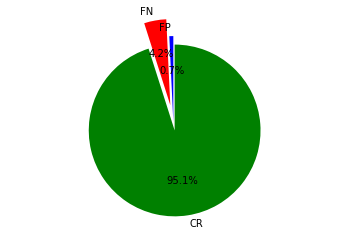

In [11]:
import matplotlib.pyplot as plt

labels = 'FP', 'FN', 'CR'
colors = 'blue', 'red', 'green'
explode = (0, 0.2, 0.1) 
sizes = [x for x in measures.values()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')

plt.show()

استخراج ایمیل های موجود در صفحه ی اول مقالات

In [12]:
searched_emails = {}

for paper_number in paper_numbers:
    searched_emails[paper_number] = []

    txt_name = TXT_NAME_FORMAT.format(number=paper_number)
    with open(PAPERS_TEXT_DIR+txt_name, 'r') as txt_file:
        contents = ''.join([line.strip() for line in txt_file.readlines()])
        searched_emails[paper_number] = re.findall('[a-z][a-z0-9._-]*@[a-zA-Z]+\.[A-Za-z]{1,3}'\
                                            , contents.replace(' ', ''))

In [13]:
searched_emails

{'8': ['haniyeh_jalali@yahoo.com'],
 '14': ['shamsmohammadjavad@yahoo.com'],
 '28': ['nakhaei.nas@gmail.Com'],
 '601': ['drsalehi@iausari.ac', 'm.t_motamed@yahoo.com'],
 '20': ['ramezani_masoud@yahoo.com'],
 '25': [],
 '3': ['sahar.dehyouri@gmail.com'],
 '24': ['j_firoozi@yahoo.com', 'tz.378945@gmail.com'],
 '6': ['allahyari@iaurasht.ac'],
 '26': ['lale_20062006@yahoo.com']}

In [14]:
searched_affiliations

{'8': ['دانشگاه آزاد اسلامی واحد علوم و تحقیقات تهران، دانشکده علوم پایه، گروه زیست شناسی، تهران، ایران',
  'دانشگاه آزاد اسلامی واحد تهران شمال، دانشکده علوم زیستی، گروه زیست شناسی، تهران، ایران',
  'دانشگاه آزاد اسلامی واحد تهران شمال، دانشکده علوم زیستی، گروه زیست شناسی، تهران، ایران',
  'دانشگاه آزاد اسلامی واحد علوم و تحقیقات تهران، دانشکده علوم پایه، گروه زیست شناسی، تهران، ایران'],
 '14': ['استادیار دانشگاه آزاد اسلامی، واحد اسلامشهر'],
 '28': ['ا- (مسوول مکاتبات): کارشناس ارشد طراحی محیط زیست، دانشکده محیط زیست و انرژی، دانشگاه آزاد واحد علوم و تحقیقات، تهران، ایران.',
  '۲- دکتری معماری، دانشیار دانشکده هنر و معماری دانشگاه تربیت مدرس، تهران، ایران.',
  '٣- دانشیار معماری منظر طراحی شهری، دانشگاه بین المللی امام خمینی، تهران، ایران.'],
 '601': ['دانشیار گروه مدیریت آموزشی، واحد ساری، دانشگاه آزاد اسلامی، ساری، مازندران',
  'دانش آموخته دکتری رشته مدیریت آموزشی، واحد ساری، دانشگاه آزاد اسلامی، ساری، مازندران (نویسنده مسئول)',
  'کارشناس رشته تاریخ، دبیر آموزش و پرورش، شهرستان م